# Goal: To reproduce Figure 4.2 (below) in Meneghetti

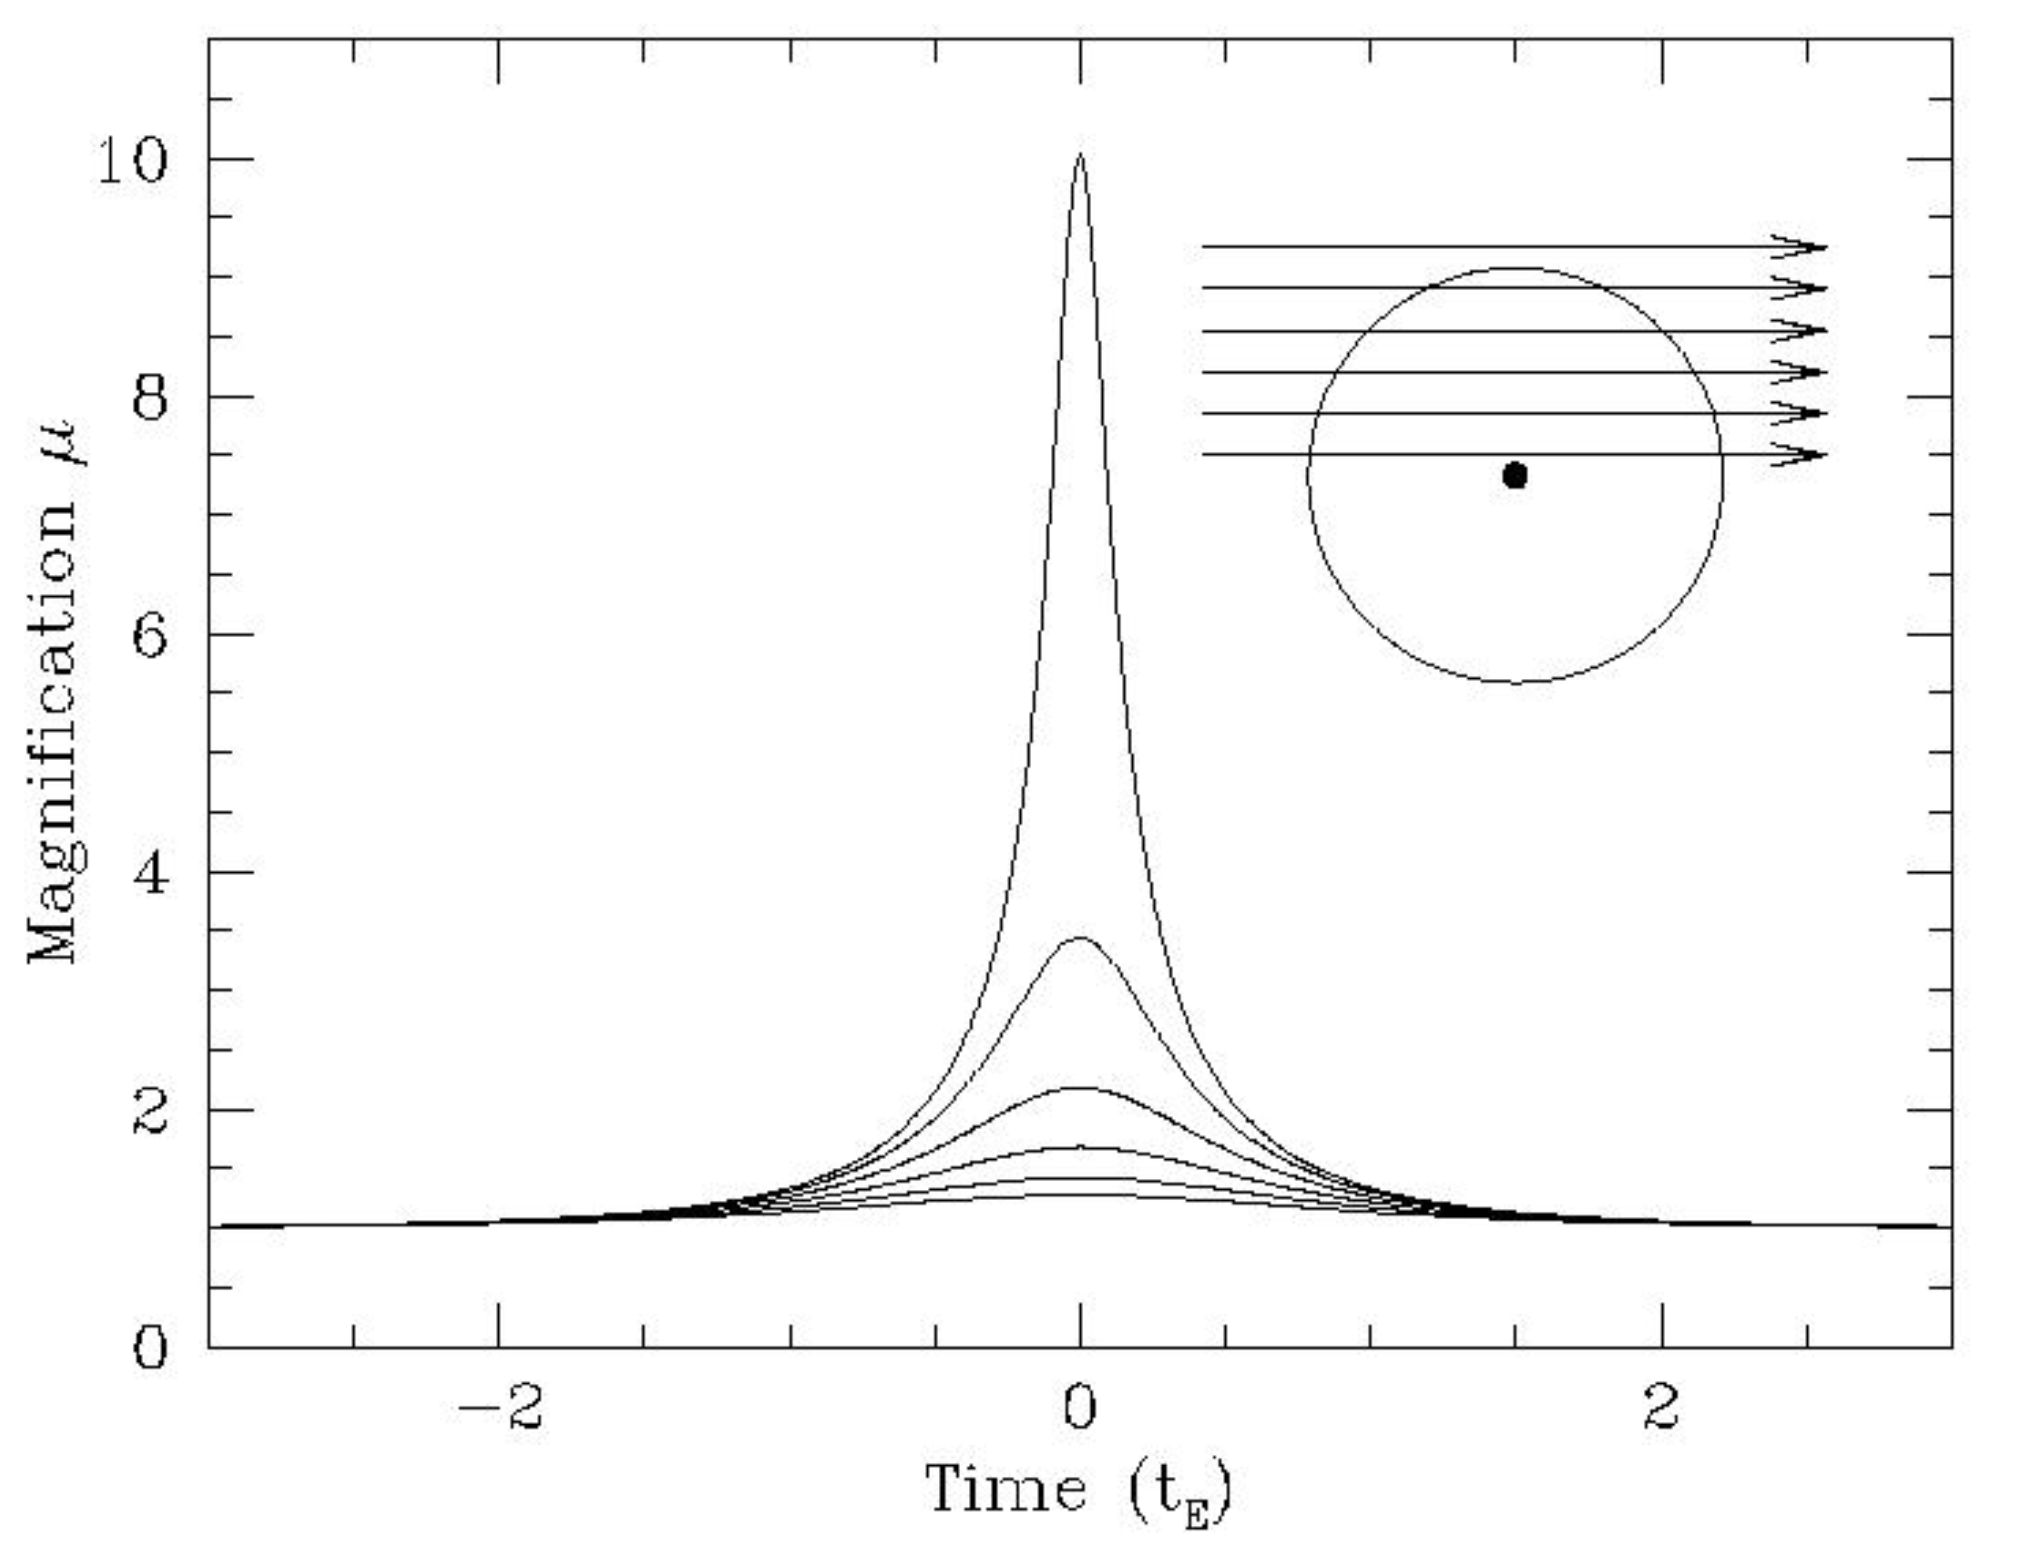

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["font.family"] = "serif"
import numpy as np

In [2]:
d_l = 4000  # distance of the lens in pc
d_s = 8000  # distance of the source in pc
M0 = 0.01  # mass of the lens in M_sol
v_perp = 1 # transverse velocity of source relative to lens - choose 1 and hope that corresponds to normalization

In [3]:
from lenstronomy.Cosmo.micro_lensing import einstein_radius
theta_E = einstein_radius(M0, d_l, d_s)

In [4]:
def einstein_time(source_distance, einstein_radius, transverse_velocity):
    # computes characteristic time scale for crossing
    return (source_distance * einstein_radius)/transverse_velocity

In [5]:
def trajectory(y_0, t_0, einsteintime, size, split):
    # assume rectilinear motion of source relative to lens
    # parameterize trajectory of source across the sky
    # y_0: impact parameter (closest approach), t_0 is when y = y_0
    # size: half-width of interval; split: time between times
    times = []
    time = -size
    while time < size:
        time += split
        times.append(time)
    positions = []
    for t in times:
        y_t = (y_0**2 + ((t - t_0)/einsteintime)**2)**(1/2)
        positions.append(y_t)
    return zip(times, positions)

In [6]:
def magnification(y):
    mu = (y**2 + 2)/(y*(y**2+4)**(1/2)) # eq 3.17 in Meneghetti
    return mu

In [7]:
y_0s = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
t_0 = 0
einsteintime = einstein_time(d_l, theta_E, v_perp)
size = 3
split = 0.00001

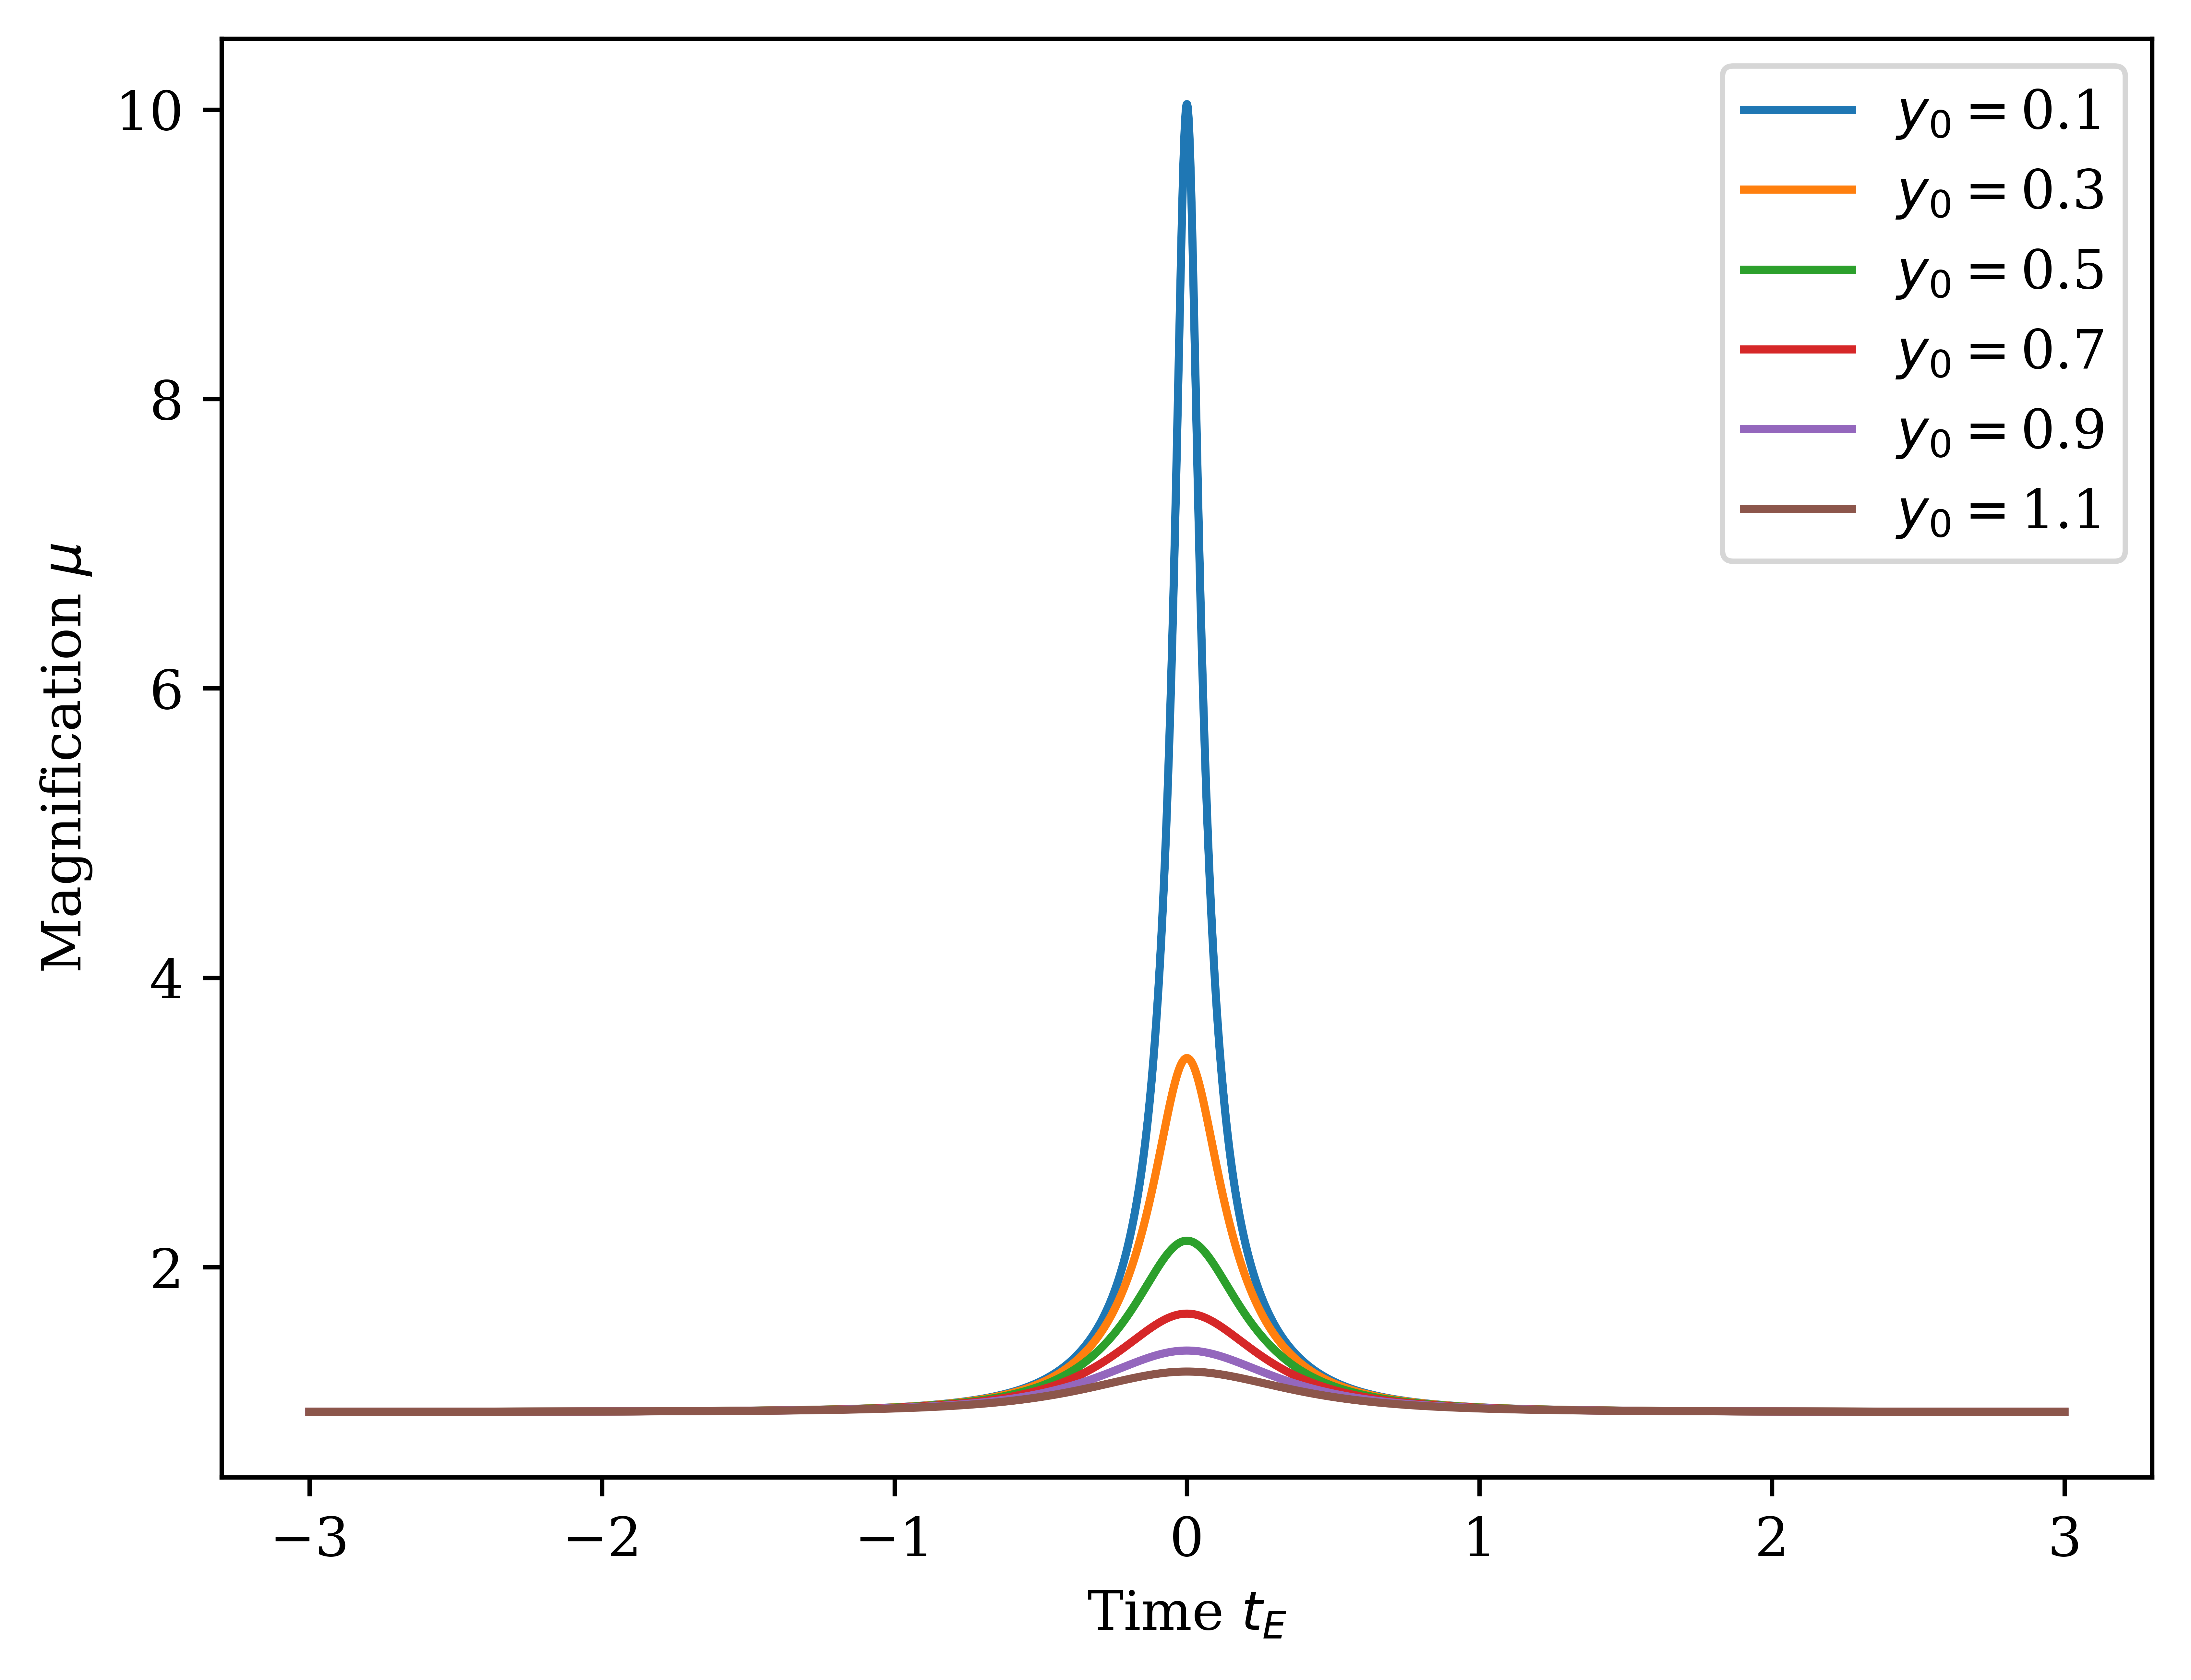

In [8]:
for y_0 in y_0s:
    times = [coords[0] for coords in trajectory(y_0, t_0, einsteintime, size, split)]
    positions = [coords[1] for coords in trajectory(y_0, t_0, einsteintime, size, split)]
    magnifications = []
    for position in positions:
        magnifications.append(magnification(position))
    plt.plot(times, magnifications, label = '$y_0 = $' + str(y_0))
plt.legend()
plt.xlabel("Time $t_E$")
plt.ylabel("Magnification $\mu$")
plt.show()

(And ours is color-coded!)